<a href="https://colab.research.google.com/github/sgr1118/NLP_Pytorch/blob/main/Chapter4_%EC%A0%84%EC%B2%98%EB%A6%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 4.1 전처리
- NLP에서 전처리란 가장 주요한 부분이다. 하지만 아쉽게도 주목도는 낮은 편이다. 자세한 전처리 방법이나 노하우는 잘 공유되지 않는 편이다.

### 4.1.1 코퍼스란?
- '말뭉치'라도고 불리는 코퍼스는 여러 단어들로 이루어진 문장을 말한다. NLP분야 ML을 수행하여면 훈련 데이터가 필요한데, 보통 이런 다수의 문장으로 구성된 코퍼스가 필요하다.

- 한 가지 언어로 구성된 코퍼스는 단일 언어 코퍼스라고 부르고 두 개의 언어로 구성된 코퍼스는 이중 언어 코퍼스라고 부른다. 이보다 더 많은 언어로 구성되 있다면 다중 언어 코퍼스라고 한다. 아래는 번역 데이터에 사용되는 병렬 코퍼스의 예시이다.

|영문|한글|
|-|-|
|I love to go to school.|나는 학교에 가는 것을 좋아한다.|

### 4.1.2 전처리 과정 개요 (교재108p 그림 참고) 
- 이번 자에서는 아래와 같은 과정을 다룬다.
 - 1. 코퍼스 수집
 - 2. 정제
 - 3. 문장 단위 분절
 - 4. 분절
 - 5. 병렬 코퍼스 정렬(생력 가능)
 - 6. 서브워드 분절

In [2]:
!wget https://www.ted.com/robots.txt

--2023-02-27 04:07:08--  https://www.ted.com/robots.txt
Resolving www.ted.com (www.ted.com)... 151.101.2.133, 151.101.66.133, 151.101.130.133, ...
Connecting to www.ted.com (www.ted.com)|151.101.2.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 394 [text/plain]
Saving to: ‘robots.txt’

robots.txt          100%[===================>]     394  --.-KB/s    in 0s      

2023-02-27 04:07:09 (12.5 MB/s) - ‘robots.txt’ saved [394/394]



In [3]:
# 크롤링 허용 여부 알아보기
!cat robots.txt

# 일부 경우에 한하여 Disallow가 되어있는 것을 볼 수 있다.

User-agent: *
Disallow: /latest
Disallow: /latest-talk
Disallow: /latest-playlist
Disallow: /people
Disallow: /profiles
Disallow: /conversations
Disallow: /themes/rss
Disallow: /discussions
Disallow: /tpv4

User-agent: Baiduspider
Disallow: /search
Disallow: /latest
Disallow: /latest-talk
Disallow: /latest-playlist
Disallow: /people
Disallow: /profiles
Disallow: /discussions
Disallow: /tpv4


## 4.2 코퍼스 수집
- 코퍼스를 수집하는 방법은 다양한다. 공개된 데이터를 사용하거나 구매할 수도있다. 크롤링을 통하여 웹사이트에서 가져오는 것도 가능하다. 다양한 웹사이트 크롤링을 수행할 수있다면 다양한 도메인의 코퍼스를 모을 수 있다.

### 4.2.1 단일 언어 코퍼스 수집
- 가장 쉽게 구할 수 있는 종류의 코퍼스이다. 왜냐하면 인터넷에 널려 있기 때문이다. 하지만 필요에 따른 올바른 도메인의 코퍼스를 수집하여야하고, 사용가능한 형태로 전처리하는 과정이 필요하다.

- 다음은 도메인에 따른 대표적인 코퍼스의 수집 방식이다. 또한 ML 대회 플랫폼 사이트인 캐글에도 많은 종류의 데이터셋이 대령 업로드되어 있으니 필요에 따라 내려받아 사용하면 매우 유용하다. 크롤링을 할 때는 해당 사이트의 robots.txt 등을 확인하고 적법한 과정을 거쳐야 한다.

- 도메인별 단일 언어 코퍼스 수집 사례

|문체|도메인|수집처|정제 난이도|
|-|-|-|-|
|대화체|일반|채팅 로드|높음|
|대화체|일반|블로그|높음|
|문어체|시사|뉴스 기사|낮음|
|문어체|과학, 교양, 역사 등|Wikipedia|중간|
|문어체|과학, 교양, 역사, 서브 컬쳐 등|나무위키|중간|
|대화체|일반(각 분야별 게시판 존재)|커뮤니티 사이트|중간|
|문어체|일반, 시사|PGR21|중간|
|대화체|일반|드라마, 영화 자막|낮음|

### 4.2.2 다중 언어 코퍼스 수집
- 기계번역을 위한 병렬 코퍼스를 구하기는 단일 언어 코퍼스에 비해 상당히 어렵다. 자막은 저작권이 있는 경우가 많으므로 저작권 관련 정보를 잘 확인해야한다.

- 도메인별 다중 언어 코퍼스 수집 사례

|문체|도메인|수집처|정제 난이도|정렬 난이도|
|-|-|-|-|-|
|문어체|시사, 과학 등|OPUS|낮음|중간|
|대화체|시사, 교양, 과학 등|TED|낮음|중간|
|문어체|시사|중앙일보영자신문|낮음|중간|
|문어체|시사|동아일보영자신문|낮음|중간|
|문어체|일반|Korean Parallel Data|낮음|낮음|
|대화체|일반|드라마, 영화 자막|낮음|중간|

- 자막 병렬 코퍼스를 사용할 시 주의점이 있다. 'he', 'she'같은 대명사가 사람 이름 등의 도유 명사로 표현될 때가 많다. 또한 영어는 존댓말이 없기 때문에 아빠를 부르는 대사에는 'you'라고 나오지만 자막은 '아빠'라고 나오기도한다. 하지만 자막을 통해 매우 많은 양의 병렬 코퍼스를 얻을 수 있는 만큼 충분히 감수할 만한 문제점이기도 하다.

## 4.3 정제
- 정제는 텍스트를 사용하기에 앞서 필수적인 과정이다. 원하는 업무, 분야에 따라 필요한 수준이나 깊이가 다르다. 음성 같은 경우 괄호 또는 특수 기호를 넣으면 안되고 개인 정보같은 민감한 정보들은 제거하거나 변조, 마스킹이 필요하다.

### 4.3.1 전각 문자 제거
- 대부분 동아시아 언어 문서 또는 숫자, 영자, 기호가 전각 문자일 때가 많다. 이런 경우 일반적으로 사용되는 반각 문자로 변환해주는 작업이 필요하다. 아래 문자들은 대표적인 반각/전각 문자로 혼용되는 대표적인 문자들이다.

- !"#$%&' () *+, _ . / 0123456789 : ; < = > ? @ ABCDEFGHIJKLMNOPQRSTUVWXYZ [\] ^ _ ' abcdefghijklmnopqrstuvwxyz {|} ~

### 4.3.2 대소문자 통일
- 일부 영어 코퍼스에서는 약자 등에서의 대소문자 표현이 통일되지 않을 때가 있다. 예를 들어 New York의 줄임말인 NY의 다음과 같이 다양하게 표현할 수 있다.

|번호|New York|
|-|-|
|1|NY|
|2|ny|
|3|N.Y.|
|4|N.Y|

- 이런 다양한 표현의 일원화는 하나의 의미를 지니는 여러 단어를 단일 형태로 통일해 희소성을 줄일 수 있다. 하지만 딥러닝 시대에 접어들어 단어 임베딩을 통한 효율적인 표현이 가능해지면서 다양한 단어들을 비슷한 값의 벡터로 나타낼 수 있게되어 대소문자 통일과 같은(전체 코퍼스에서 차지하는 비중이 낮은) 문제를 해결할 필요성이 줄어들게되었다.

### 4.3.3 정규 표현식을 사용한 정제
- 크롤링을 통해 얻어낸 다량의 코퍼스는 보통 특수 문자, 기호 등에 의해 노이즈가 섞일 때가 많다. 또한, 웹사이트의 성격에 따라 일정한 패턴을 지니는 경우도 많다.이러한 노이즈들을 효율적으로 감지하고 없애려면 인덱스의 사용은 필수다.

- 전처리 시각화 사이트 : https://regexper.com/
- 전처리 연습 사이트 : https://regexr.com/

1. [] 사용
- 다음 정규 표현식은 '2 or 3 or 4 or 5 or c or d or e'와 같은 의미를 가진다.
- [2345cde] or (2|3|4|5|c|d|e)

2. - 사용
- 앞의 정규 표현식에서 연속된 숫자 또는 알파벳을 하나 하나 전부 적는 비효율적이다. 이때 '-'를 사용하면 연속된 숫자 또는 알파벳들을 표현할 수 있다.
- [2-5c-e]

3. [^] 사용
- Not을 기호 '^'를 써서 표현할 수 있다. 2~5까지 c~e까지를 제외한 정규표현식은 다음과 같다.
- [^2-5c-e]

4. () 사용
- 괄호를 이용하여 그룹을 만들 수 있다.
- (x)(yz)

5. | 사용
- '또는'에 해당하는 or
- (x|y)

6. ?, *, + 사용
- 앞의 수식하는 부분이 한 번 이상 나타날 경우 '+'사용
- x+

- 앞의 수식하는 부분이 나타나지 않거나 여러 번 나타날 경우 '*' 사용
- x*

7. {n}, {n,}, {n,m} 사용
- 앞에서 살펴본 반복 여부에 대한 정규 표현식도 중요하지만, 정확하게 반복 횟수의 범위를 알고 싶다면 다음 방법을 사용하는 편이 좋다.
- x{n} : x가 n번 반복될 때
- x{n,} : x가 n번 이상 반복될 때
- x{n,m} : x가 n ~ m번 사이를 반복할 때

8. . 사용
- '.'은 매우 강력한 표현이다. 그 어떤 글자도 '.'에 포함될 수 있다.

9. ^와 $ 사용
- '^'은 라인의 시작을 '$'은 라인의 종료를 말하며 이 조건에서 거를 내용을 추출할 수 있다.
- ^x$

|지정 문자 사용|
- 이외에도 지정 문자를 사용하여 비슷한 유형의 글자들을 표현 가능하다.

|지정 문자|설명|
|-|-|
|\s|공백 문자|
|\S|공백 문자를 제외한 모든 문자|
|\w|알파벳 + 숫자 + '_'([A-Za-z0-9_]와 같다.)|
|\W|[^A-Za-z0-9_]와 같다.|
|\d|[0-9]와 같다|
|\D|[^0-9]와 같다.|

|예제|
- 실제 예를 통하여 알아보자. 다음과 같이 개인 정보를 포함한 데이터에서 개인 정보를 제외하고 사용하고자 한다. 무턱대고 마지막 줄을 지우자니 전화번호가 없는 경우도 많기 때문에 선택적으로 지워야 한다. 아래 텍스트는 이런 규칙을 따르는 듯 하다. (교재 118p 정규표현식 적용 과정 그림 참고)

- Hello Ki, I would like to introduce regular expression inthis setion.
- ~~
- Thank you!
- Sincerely,
- Ki : +82-10-1234-5678

- 이름이 전화번호 앞에 나올 수도 있다.
- 이름 뒤에는 콜론(:)이 나올 수도 있다.
- 콜론 앞/뒤로 (탭을 포함한) 공백이 다수 존재할 것이다.
- 전화번호는 국가번호를 포함할 수 있다.
- 국가번호는 최대 3자리이다.
- 국가번호 앞에는 '+'가 붙을 수도 있다.
- 전화번호 사이에 '-'가 들어갈 수 있다.
- 전화번호는 빈칸 없이 표현된다.
- 전화번호는 맨 앞과 지역번호(또는 010)의 다음에는 괄호가 들어갈 수 있다.
- 괄호는 한쪽만 나올 수도 있다.
- 지역번호 자리의 맨 처음에 나오는 0은 빠질 수도 있다. 즉, 2자리가 될 수도 있다.
- 지역번호 다음 그룹은 3에서 4자리 숫자이다.
- 마지막은 항상 4자리 숫자이다.

- 이 규칙에 맞게 정규표현식을 완성하면 다음과 같다.
- ([\w]+\s*:?\s*)?\(?\+?([0-9]{1,3})?\-?[0-9]{2,3}(\)|\-)?[0-9]{3,4}\-?[0-9]{4}


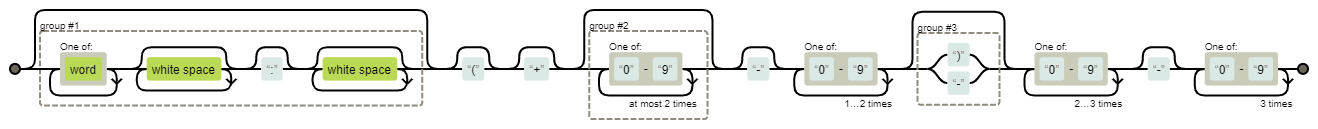


|파이썬에서 정규 표현식 사용|
- 파이썬에도 정규 표현식을 사용하여 작업을 수행할 수 있다.

In [5]:
import re

regex = r'([\w]+\s*:?\s*)?\(?\+?([0-9]{1,3})?\-?[0-9]{2,3}(\)|\-)?[0-9]{3,4}\-?[0-9]{4}'

x = 'Ki: +82-10-1234-5678'
re.sub(regex, 'REMOVED', x) # 삭제됐음을 확인할 수 있다.

'REMOVED'

|치환자 사용|
- 이때까지 다룬 정규 표현식의 표현만으로도 많은 문제를 해결할 수 있지만, 좀 더 알아보자. 다음과 같은 경우를 다루어 보자.
- 문제 : 알파벳(소문자) 사이에 있는 숫자를 제거하시오.

a1bc2d, 12ab, a1b, a1, 1a, rlfkr, 12345

- [0-9]+로 삭제는 가능하지만 숫자만 있는 경우도 전부 삭제될 것이다. 이때는 치환자를 사용하는 것이 유용하다.

In [8]:
# 치환자 사용

x = '''a1bc2d, 
12ab, 
a1b, 
a1, 
1a, 
rlfkr, 
12345
'''

regex = r'([a-z])[0-9]+([a-z])'
to = r'\1\2'

y = '\n'.join([re.sub(regex, to, x_i) for x_i in x.split('\n')])

In [9]:
# 결과 학인
y

'abcd, \n12ab, \nab, \na1, \n1a, \nrlfkr, \n12345\n'

## 4.4 문장 단위 분절
- 보통 다루려는 문제들은 입력 단위가 문장 단위인 경우가 많다. 즉 대부분의 경우 한 라인에 한 문장만 있어야 한다. 여러 문장이 있거나, 한 문장이 여러 라인에 걸쳐 있는 경우에는 문장 단위 분절이 필요하다.

- 단순히 마침표를 기준으로 문장 단위 분절은 제대로된 분절이 잘 되지 않으므로 분절을 도와주는 알고리즘을 사용하는게 좋다. 대표적으로 NLTK가있다.

### 4.4.1 문장 단위 분절

In [ ]:
# 문장 분절 예시

import sys, fileinput, re
from nltk.tokenize import sent_tokenize
import nltk
nltk.download('punkt')

if __name__ == "__main__":
    for line in fileinput.input():
        if line.strip() != "":
            line = re.sub(r'([a-z])\.([A-Z])', r'\1. \2', line.strip())

            sentences = sent_tokenize(line.strip())

            for s in sentences:
                if s != "":
                    sys.stdout.write(s + "\n")

In [12]:
cd '/content/drive/MyDrive/Book/NLP Camp/Chapter_4_txt'

/content/drive/MyDrive/Book/NLP Camp/Chapter_4_txt


In [21]:
# 파일 업로드 확인
!ls

input.ko.txt  line_separator  line_separator.py


In [22]:
# 실행

!python line_separator.py input.ko.txt

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
자연어처리는 인공지능의 한 줄기 입니다.
시퀀스 투 시퀀스의 등장 이후로 딥러닝을 활용한 자연어처리는 새로운 전기를 맞이하게 되었습니다.
문장을 받아 단순히 수치로 나타내던 시절을 넘어, 원하는대로 문장을 만들어낼 수 있게 된 것 입니다.


### 4.4.2 문장 합치기 및 분절 예제

In [ ]:
# 문장 합치기 및 분절 예제

import sys, fileinput
from nltk.tokenize import sent_tokenize

if __name__ == "__main__":
    buf = []

    for line in fileinput.input():
        if line.strip() != "":
            buf += [line.strip()]
            sentences = sent_tokenize(" ".join(buf))

            if len(sentences) > 1:
                buf = sentences[1:]

                sys.stdout.write(sentences[0] + '\n')

    sys.stdout.write(" ".join(buf) + "\n")

In [31]:
# 실행

!python combine_line.py input._2ko.txt

자연어처리는 인공지능의 한 줄기 입니다.
시퀀스 투 시퀀스의 등장 이후로 딥러닝을 활용한 자연어처리는 새로운 전기를 맞이하게 되었습니다.
문장을 받아 단순히 수치로 나타내던 시절을 넘어, 원하는대로 문장을 만들어낼 수 있게 된 것 입니다.


## 4.5 분절
- 우리가 풀고자 하는 문제에 따라 형태소 분석 또는 단순한 분절을 통해 정규화를 수행한다. 특히 띄어쓰기에 대하여 알아보겠다. 한국과 비슷한 문화권인 중국이나 일본은 띄어쓰기가 없다. 그런데 한국어는 띄어쓰기가 중구난방인 경우가 많다. 특히 한국어는 띄어쓰기가 문장 의미 해석에 큰 영향을 끼치지 않으므로 이런 현상은 더 가중된다.

- 즉, 띄어쓰기가 이미 됐다하더라고 제각각인 경우가 많기에, 정규화를 해주는 의미로 다시 한번 표준화된 띄어쓰기를 적용하는 과정이 필요하다. 또한, 교착어로써 접사를 어근에서 분리해주는 역할도 하므로 희소성 문제를 해소하기도 한다.

- 각 언어별 주요 프로그램

|언어|프로그램명|제작 언어|특징|
|-|-|-|-|
|한국어|Mecab|C++|일어 Mecab을 랩핑했으며, 속도가 가장 빠르나 설치가 종종 까다롭다.|
|한국어|KoNLPy|Python Wrapping(복합)|PIP를 통하여 설치 가능하며 사용이 쉬우나 일부 모듈의 경우에는 속도가 느리다.|
|일본어|Mecab|C++|속도 빠름|
|중국어|Stanford Parser|Java|미 스탠포드에서 개발|
|중국어|PKU Parser|Java|북경대에서 개발, 스탠포드 파서와 성능 차이가 거의 없다.|
|중국어|Jieba|Python|가장 최근에 개발, 파이썬으로 제작되어 시스템 구성에 용이하다.|

- 대부분의 프로그램은 성능이 비슷하나 신조어나 고유 명사를 처리하는 능력은 각 ㅡ로그램의 성능의 차이를 만든다.

$$$ 4.5.1 한국어 분절

|Mecab|
- 한국어 분절에 가장 많이 사용되는 프로그램이다. 다음과 같이 입력하면 설치가 가능하다.

|KoNLPy|
- KoNLPy는 여러 한국어 형태소 분석기들을 모아높은 랩핑 라이브러리를 제공한다. 이름에서 알 수 있듯이 파이썬으로 구성된 라이브러리를 제공하므로 시스템 연동 및 구성이 용이할 수 있다. 하지만 내부 라이브러리들은 각기 다른 언어(Java, C++ 등)로 이루어져 있어 호환성에 문제가 생기기도 한다.

In [ ]:
# mecab 설치

!curl -s https://raw.githubusercontent.com/teddylee777/machine-learning/master/99-Misc/01-Colab/mecab-colab.sh | bash

In [38]:
from konlpy.tag import Okt, Mecab

text = '안녕하세요, 반갑습니다!'
mecab = Mecab()

print(mecab.morphs(text))

['안녕', '하', '세요', ',', '반갑', '습니다', '!']


### 4.5.2 영어 분절

|Moses|
- 영어는 기본적인 띄어쓰기가 잘 통일되어 있는 편이므로, 띄어쓰기에 대한 큰 정규화 이슈는 없다. 다만 쉼표, 마침표, 인용부호 등을 띄어주어야 한다. Moses에서 제공하는 분절 기능을 통해 이런 처리를 수행합니다. NLTK예전 버젼(3.2.5)에서는 Moses를 포함했으므로 분잘 기능을 제공했다.

In [39]:
# nltk 3.2.5 버젼 설치

!pip install nltk==3.2.5

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 17.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for nltk: filename=nltk-3.2.5-py3-none-any.whl size=1392160 sha256=d1b1dfcb47716d74b41c5e38698218b39dfec78f5927cec3e0fe5cfd0d0a2cca
  Stored in directory: /root/.cache/pip/wheels/8e/f8/1e/2d246c37b7be22a286ccfb2570fe8ad37177e883cb06cecae6
Successfully built nltk
  Attempting uninstall: nltk
    Found existing installation: nltk 3.7
    Uninstalling nltk-3.7:
      Successfully uninstalled nltk-3.7


In [16]:
import nltk
nltk.download('perluniprops')
nltk.download('nonbreaking_prefixes')

[nltk_data] Downloading package perluniprops to /root/nltk_data...
[nltk_data]   Package perluniprops is already up-to-date!
[nltk_data] Downloading package nonbreaking_prefixes to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping corpora/nonbreaking_prefixes.zip.


True

In [ ]:
# Moses 분절 예시

import nltk
nltk.download('perluniprops')
nltk.download('nonbreaking_prefixes')

import sys, fileinput
from nltk.tokenize.moses import MosesTokenizer

t = MosesTokenizer()

if __name__ == "__main__":
    for line in fileinput.input():
        if line.strip() != "":
            tokens = t.tokenize(line.strip(), escape=False)

            sys.stdout.write(" ".join(tokens) + "\n")
        else:
            sys.stdout.write('\n')

In [14]:
cd '/content/drive/MyDrive/Book/NLP Camp/Chapter_4_txt'

/content/drive/MyDrive/Book/NLP Camp/Chapter_4_txt


In [17]:
# 실행

!python moses.py input.en.txt

[nltk_data] Downloading package perluniprops to /root/nltk_data...
[nltk_data]   Package perluniprops is already up-to-date!
Natural language processing is one of biggest stream in artificial intelligence , and it becomes very popular after seq2seq 's invention .


### 4.5.3 중국어 분절

|스탠포드 파서|
- 참고사이트 : https://nlp.stanford.edu/software/lex-parser.shtml

|JIEBA|
- 비교적 늦게 개발되었지만, 성능상으로는 다른 형태소 분석기와 큰 차이가 없다.다만 파이썬으로 구현되었기 때문에 실제 상용화를 배치 시스템을 구현할 때 매우 쉽고 용이하게 사용할 수 있다.

## 4.6 병렬 코퍼스 정렬
- 대부분의 병렬 코퍼스들은 여러 문장 단위로 정렬된다. 예를 들어 영자 신문에서 크롤링한 영어문 뉴스 기사는 한글 뉴스 기사에 맵핑되지만, 문서와 문서 단위의 맵핑일 뿐 문장 대 문장에 관한 정렬은 이루어져 있지 않다. 이런 경우 각각의 문장에 대해 정렬해주어야한다. 그 과정에서 일부 불필요한 문장들을 걸러내야 하고, 문장 간 정렬이 잘 맞지 않는다면 정렬을 재정비하거나 아예 걸러내야 한다.

### 4.6.1 병렬 코퍼스 제작 프로세스 개요
- 정렬을 수행하기 뒤한 전체 과정을 요약하면 다음과 같다.
 - 1. 소스 언어와 타깃 언어 사이의 단어 사전을 준비한다.
 - 2. 만약 준비된 단어 사전이 없다면 다음 작업을 수행한다. 만약 단어 사전이 있다면 7번을 수행한다.
 - 3. 각 언어에 대해서 코퍼스를 수집 및 정제한다.
 - 4. 각 언어에 대해서 단어 임베딩 벡터를 구한다.
 - 5. MUSE를 통해 단어 레벨 번역기를 훈련한다.
 - 6. 훈련된 단어 레벨 번역기를 통해 두 언어 사이의 단어 사전을 생성한다.
 - 7. 만들어진 단어 산정을 넣어 Champollion을 통해 기존에 수집된 다중 언어 코퍼스를 정렬한다.
 - 8. 각 언어에 대해서 단어 사전을 적용하기 위해 알맞은 수준의 분절을 수행한다.
 - 9. 각 언어에 대해서 정제를 수행한다.
 - 10. Champollion을 사용하여 병렬 코퍼스를 생성한다.

### 4.6.2 사전 생성
- 만약 단어 사전이 없다면 구축해야하는데 이때 단어 사전을 자동으로 구축하는 방법이 있다. 페이스북의 MUSE는 병렬 코퍼스가 없는 상황에서 사전을 구축하는 방법과 코드를 제공한다. 각 단일 언어 코퍼스를 통해 구축한 언어별 단어 임베딩 벡터에 대해 다른 언어의 임베딩 벡터와 맵핑시켜 단어 간 번역을 수행할 수 있다. 이는 각 언어별 코퍼스가 많을수록, 임베딩 벡터가 많을수록 더욱 정확해진다. MUSE는 병렬 코퍼스가 없는 상황에서 수행할 수 있기 때문에 비지도학습이라고 할 수 있다.

- 이렇게 만들어진 사전은 다음 절에서 CTK의 입력으로 사용되며, CTK은 이 사전을 바탕으로 병렬 코퍼스의 문장 정렬을 수행한다. '<>' 구분 문자로 사용하여 한 라인에 소스 언어의 단어와 타킷 언어의 단어를 표현한다. 물론 잘못 맵칭되는 경우도 있지만 꽤 괜찮은 결과물을 제공한다.

### 4.6.3 CTK을 활용한 정렬
- CTK(Champollion Toolkit)은 이중 언어 코퍼스의 문장 정렬을 수행하는 오픈소스이다. 이렇게 맵핑되어지는 단어들을 보면 버려지거나, 일대일, 일대다, 다대일 맵핑이 이루어지기도 한다. (교재 130p 예제 참고)

- 아래는 CTK을 쉽게 사용하기 위해 파이썬으로 감싼 스크립트 예제이다. 'CTK_ROOT'에 CTK 위치를 지정하여 사용할 수 있다.

In [ ]:
import sys, argparse, os

BIN = CTK_ROOT + "/bin/champollion"
CMD = "%s -c %f -d %s %s %s %s"
OMIT = "omitted"
DIR_PATH = './tmp/'
INTERMEDIATE_FN = DIR_PATH + "tmp.txt"

